#   **Loading Diabetes Dataset**

#   **Preparing Data for Modeling**

#   **Training the Neural Network Model**

#   **Compiling the Model**

#   **Fitting the Model**

#   **Train Accuracy**

#   **Testing Accuracy**

#   **Visualizing the Data**

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score

# keras documentation https://keras.io/

# Load the dataset

In [3]:

data = pd.read_csv(r'D:\Sem - 5\ML- LAB\ann library\diabetes.csv')

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<Axes: xlabel='Outcome'>

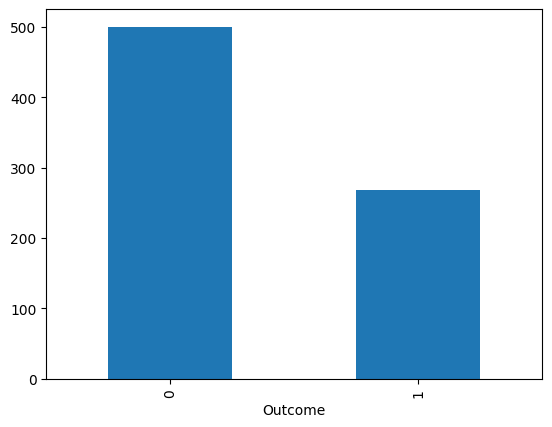

In [6]:
import seaborn as sns
data['Outcome'].value_counts().plot(kind='bar')

In [7]:
# feature importance
cor_matrix = data.corr()
cor_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [8]:
names = []
# Assume 'cor_matrix' is your full correlation matrix
rel_features = cor_matrix['Outcome'][abs(cor_matrix['Outcome']) > 0.25]

# Add only the features with correlation > 0.25 (excluding 'Outcome' itself)
names = rel_features.index.tolist()
if 'Outcome' in names:
    names.remove('Outcome')

print("Features with correlation > 0.25:")
print(names)

# Print each relevant feature's correlation with 'Outcome'
for name in names:
    print(f'{name} : {rel_features[name]: .4f}')


Features with correlation > 0.25:
['Glucose', 'BMI']
Glucose :  0.4666
BMI :  0.2927


# Preparing Data for modeling
# Split into input (X) and output (y) variables

In [9]:

predictors = data.iloc[:, 0:8]
response = data.iloc[:, 8]

# Create training and testing vars

In [10]:

X_train, X_test, y_train, y_test = train_test_split(predictors, response, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(614, 8) (614,)
(154, 8) (154,)


# Define the keras model - Layer by Layer

In [11]:
kerasmodel = Sequential()  # Initializing model - Dense for fully connected layer
kerasmodel.add(Dense(12, input_dim=8, activation='relu'))  # First Hidden layer
kerasmodel.add(Dense(8, activation='relu'))  # Second Hidden layer
kerasmodel.add(Dense(8, activation='relu'))
kerasmodel.add(Dense(1, activation='sigmoid'))  # Output layer


d:\Jing-Jing\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Compiling the model

In [12]:
kerasmodel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fitting the model

In [16]:
kerasmodel.fit(X_train, y_train, epochs=200, batch_size=10)

Epoch 1/200
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7471 - loss: 0.4848
Epoch 2/200
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step - accuracy: 0.7157 - loss: 0.5461
Epoch 3/200
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - accuracy: 0.7320 - loss: 0.4987
Epoch 4/200
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7537 - loss: 0.4795
Epoch 5/200
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7644 - loss: 0.4829
Epoch 6/200
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step - accuracy: 0.7673 - loss: 0.4882
Epoch 7/200
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step - accuracy: 0.7252 - loss: 0.5193
Epoch 8/200
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 832us/step - accuracy: 0.7549 - loss: 0.4985
Epoch 9/200
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step - accuracy: 0.7740 - loss: 0.4416
Epoch 10/200
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step - accuracy: 0.7219 - loss: 0.5065
Epoch 11/200
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7293 - loss: 0.5135
Epoch 12/200
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/

# Train accuracy

In [17]:
loss, accuracy = kerasmodel.evaluate(X_train, y_train)
print(f'Train Accuracy: {accuracy*100 : .4f}')
print(f"Loss : {loss : .4f}")


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step - accuracy: 0.7811 - loss: 0.4263
Train Accuracy:  77.5244
Loss :  0.4219


# Test accuracy

In [18]:
y_pred = (kerasmodel.predict(X_test) > 0.5).astype('int32')
print('Test Accuracy:', accuracy_score(y_test, y_pred))


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Test Accuracy: 0.7207792207792207
